# Linear regression solution with some error

## Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

## Read files

In [2]:
train = pd.read_csv("data.csv")
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [3]:
train.shape

(75757, 64)

## Drop all missing value

In [4]:
train = train.dropna()
train.isnull().sum().sum()

0

In [5]:
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
404,2,State_1,Residential,Mixed_Use_Predominantly_Commercial,34173.0,1913.0,100.0,2.4,27,48.951613,...,113,35,1,0,1.0,1.0,1.0,88.0,18.674253,404
405,2,State_1,Commercial,Lodging_Hotel,46800.0,1914.0,61.0,2.4,27,48.951613,...,113,35,1,0,1.0,1.0,1.0,88.0,91.140820,405
406,2,State_1,Commercial,Lodging_Hotel,162214.0,1924.0,35.0,2.4,27,48.951613,...,113,35,1,0,1.0,1.0,1.0,88.0,106.120497,406
407,2,State_1,Commercial,Lodging_Hotel,168000.0,1927.0,74.0,2.4,27,48.951613,...,113,35,1,0,1.0,1.0,1.0,88.0,65.825098,407
411,2,State_1,Commercial,Lodging_Hotel,99000.0,1929.0,98.0,2.4,27,48.951613,...,113,35,1,0,1.0,1.0,1.0,88.0,54.411775,411


In [6]:
train.shape

(11309, 64)

## Analyse train

In [5]:
train.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,11309.000000,1.130900e+04,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,...,11309.000000,11309.000000,11309.000000,11309.0,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000
mean,4.239986,1.739833e+05,1950.422495,60.266160,25.995260,9.040676,32.028101,57.736847,8.269166,32.035417,...,90.912459,13.775400,0.148289,0.0,135.959855,138.556017,7.482403,104.319215,86.089729,40872.923778
std,1.611790,2.394279e+05,36.709971,28.611072,35.606503,6.500818,5.151088,4.211625,10.098536,8.132401,...,19.202911,7.083735,0.462449,0.0,163.072400,166.213639,7.936777,51.896672,58.793547,19195.989679
min,1.000000,8.019000e+03,0.000000,0.000000,1.800000,-9.000000,20.403226,44.000000,-13.000000,13.553571,...,6.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,12.000000,1.300537,404.000000
25%,3.000000,6.683200e+04,1927.000000,39.000000,3.400000,6.000000,29.677419,56.000000,2.000000,23.946429,...,75.000000,12.000000,0.000000,0.0,1.000000,1.000000,1.000000,65.000000,60.010595,22261.000000
50%,5.000000,9.835200e+04,1951.000000,66.000000,25.600000,8.000000,29.854839,56.000000,2.000000,31.625000,...,96.000000,12.000000,0.000000,0.0,1.000000,1.000000,1.000000,106.000000,78.527155,45080.000000
75%,5.000000,1.725900e+05,1971.000000,84.000000,42.700000,11.000000,34.451613,59.000000,15.000000,37.706897,...,106.000000,17.000000,0.000000,0.0,330.000000,340.000000,17.000000,148.000000,99.826503,52447.000000
max,6.000000,3.636683e+06,2015.000000,100.000000,201.800000,41.000000,55.096774,77.000000,42.000000,56.803571,...,136.000000,52.000000,10.000000,0.0,360.000000,360.000000,23.300000,261.000000,916.909240,73148.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11309 entries, 404 to 73148
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                11309 non-null  int64  
 1   State_Factor               11309 non-null  object 
 2   building_class             11309 non-null  object 
 3   facility_type              11309 non-null  object 
 4   floor_area                 11309 non-null  float64
 5   year_built                 11309 non-null  float64
 6   energy_star_rating         11309 non-null  float64
 7   ELEVATION                  11309 non-null  float64
 8   january_min_temp           11309 non-null  int64  
 9   january_avg_temp           11309 non-null  float64
 10  january_max_temp           11309 non-null  int64  
 11  february_min_temp          11309 non-null  int64  
 12  february_avg_temp          11309 non-null  float64
 13  february_max_temp          11309 non-null  i

## print and remove all "object" columns

In [9]:
for col in train.columns:
    if train[col].dtype=="object":
        print(col, np.unique(train[col]))
        train = train.drop(col, axis=1)

State_Factor ['State_1' 'State_10' 'State_11' 'State_2' 'State_4' 'State_6' 'State_8']
building_class ['Commercial' 'Residential']
facility_type ['2to4_Unit_Building' '5plus_Unit_Building' 'Commercial_Other'
 'Data_Center' 'Education_College_or_university'
 'Education_Other_classroom' 'Education_Uncategorized' 'Food_Sales'
 'Grocery_store_or_food_market' 'Health_Care_Inpatient'
 'Health_Care_Outpatient_Clinic' 'Health_Care_Outpatient_Uncategorized'
 'Industrial' 'Lodging_Dormitory_or_fraternity_sorority' 'Lodging_Hotel'
 'Mixed_Use_Commercial_and_Residential'
 'Mixed_Use_Predominantly_Commercial' 'Multifamily_Uncategorized'
 'Nursing_Home' 'Office_Bank_or_other_financial'
 'Office_Medical_non_diagnostic' 'Office_Mixed_use' 'Office_Uncategorized'
 'Parking_Garage' 'Public_Safety_Courthouse' 'Religious_worship'
 'Retail_Enclosed_mall' 'Retail_Strip_shopping_mall'
 'Retail_Uncategorized' 'Service_Uncategorized'
 'Service_Vehicle_service_repair_shop'
 'Warehouse_Distribution_or_Shipping_ce

## Analyse label

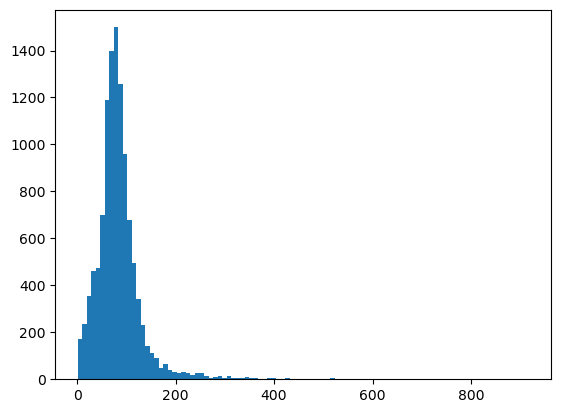

In [10]:
plt.hist(train.site_eui, bins=100, density=False);

## Define X and y

In [11]:
y = train.pop("site_eui")
X = train
X.shape, y.shape

((11309, 60), (11309,))

## Build linear regression model

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

## Evaluate model

In [13]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, y_pred)

24.35288240439537